In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

In [2]:
#name="pk1330-08112021-0101"
#name="pk1330-10112021-0101"
#name="pk1330-16112021-0101"

#name="pk1330-12112021-0101"
#name="pk1331-23112021-0101"
#name="pk1331-23112021-0101_B"

#name="pk1331-24112021-0101"
#name="pk1347-24112021-0101"

#name="pk1331-29112021-0101"
#name="pk1347-01122021-0101"

#name="pk1658-06122021-0102"

#name="pk1331-29112021-0101" # HD cells
#name="pk1658-10122021-0101"

#name="pk1613-12012022-0101"
#name="pk1613-13012022-0101"

#name="pk1615-14012022-0101"

#name="pk1615-15012022-0101"
#name="pk1615-16012022-0101"
#name="pk1615-17012022-0101"
#name="pk1615-18012022-0101_A"

#name="pk1615-18012022-0103"
#name="pk1615-19012022-0105" ## remapping ! (black-white-black)
#name="pk1615-19012022-0102"

#name="pk1615-20012022-0101_B"
#name="pk3865-20012022-0101_B"

#name="pk3865-21012022-0101"

#name="pk1615-21012022-0109"  # five different environments in two different rooms
name="pk3865-24012022-0109"  # five different environments in two different rooms

In [3]:
# mouse name = .... , plot on summary file

import os

basedirs = ["/adata/electro", "/home/pascal/remote/ext_drives/d66/data/electro"]
found=False
for basedir in basedirs:
    if os.path.isdir(basedir):
        found=True
        print("use basedir:",basedir)
        break
if not found:
    raise IOError("no dir found")

directory, session = name.split("-",1)
path=basedir+"/"+directory+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", directory)
print("Session:", session)
print("Name:", name, ",", fname)

print("directory:", "OK" if os.path.isdir(path) else "invalid")

use basedir: /adata/electro
Path: /adata/electro/pk3865/pk3865-24012022-0109/
Mouse: pk3865
Session: 24012022-0109
Name: pk3865-24012022-0109 , pk3865-24012022-0109
directory: OK


In [4]:
remotepath="/home/pascal/remote"
prefixdir = remotepath if os.path.isdir(remotepath) else ""
print("prefixdir",prefixdir)

prefixdir 


Check the files

## Get a Session object and load spikes

In [5]:
ses = Kilosort_session(name=fname,path=path)
ses.load_parameters_from_files()
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = pk3865-24012022-0109
path = /adata/electro/pk3865/pk3865-24012022-0109
subject = pk3865
session_dat_time = 2022-01-24 01:09:00
fileBase = /adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109
file_names = {'par': '/adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109.par', 'desen': '/adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109.desen', 'desel': '/adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109.desel', 'sampling_rate': '/adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109.sampling_rate_dat', 'stimulation': '/adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109.stimulation', 'px_per_cm': '/adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109.px_per_cm', 'setup': '/adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109.setup', 'environmentFamiliarity': '/adata/electro/pk3865/pk3865-24012022-0109/pk3865-24012022-0109.environmentFamiliarity', 'params':

In [6]:
ses.trial_intervals.inter

array([[   0.     , 1443.92395],
       [1443.924  , 1853.35195],
       [1853.352  , 2990.37595],
       [2990.376  , 3203.49595],
       [3203.496  , 4512.85195],
       [4512.852  , 4792.75195],
       [4792.752  , 5928.83995],
       [5928.84   , 6419.95195],
       [6419.952  , 7987.31995]])

In [7]:
ses.desen

['sqr80-black_cue-W',
 'rb',
 'sqr80-white_cue-N',
 'rb',
 'sqr80_black_cue-E',
 'rb',
 'circ70_black_cue-S',
 'rb',
 'sqr80-black_cue-W']

In [8]:
ses.setup

['28B', '28B', '28B', '28B', '55B', '55B', '55B', '55B', '28B']

In [6]:
for t,(tn,iv,en,su,ef) in enumerate(zip(ses.trial_names, ses.trial_intervals.inter, ses.desen, ses.setup, ses.environmentFamiliarity)):
    print("#",t)
    print("trial:",tn)
    print("environment:",en)
    print("familiarity:",ef)
    print("duration:",iv[1]-iv[0])
    print("setup:",su)
    print("")

# 0
trial: pk3865-24012022_01
environment: sqr70-black_cue-W
familiarity: fam
duration: 529.73995
setup: 28B

# 1
trial: pk3865-24012022_02
environment: rb
familiarity: rb
duration: 194.61595
setup: 28B

# 2
trial: pk3865-24012022_03
environment: sqr70-white_cue-N
familiarity: novel
duration: 866.73595
setup: 28B

# 3
trial: pk3865-24012022_04
environment: rb
familiarity: rb
duration: 109.43994999999995
setup: 28B

# 4
trial: pk3865-24012022_05
environment: sqr70_black_cue-E
familiarity: novel
duration: 1548.9719499999999
setup: 55B

# 5
trial: pk3865-24012022_06
environment: rb
familiarity: rb
duration: 140.03995000000032
setup: 55B

# 6
trial: pk3865-24012022_07
environment: circ80_black_cue-S
familiarity: novel
duration: 1347.58795
setup: 55B

# 7
trial: pk3865-24012022_08
environment: rb
familiarity: rb
duration: 255.20395000000008
setup: 55B

# 8
trial: pk3865-24012022_09
environment: sqr70-black_cue-W
familiarity: fam
duration: 1258.59595
setup: 28B



In [10]:
ses.desel

['adn', 'adn', 'adn', 'adn', 'mec', 'mec', 'mec', 'mec']

In [7]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
print("stl.clu_ids",stl.clu_ids)
cg = Cell_group(stl)
cg.set_info_from_session(ses, maxchannels=3)

stl.clu_ids [ 2  5  6  7  8  9 10 11 13 19 20 26 31]
templates.shape (32, 82, 64)
Clusters: 32 , timepoints: 82 , Channels: 64


In [8]:
for n in cg.neuron_list:
    print(n.name, n.channels, n.brain_area) 

2 [3 1 8] ['adn']
5 [6 7 4] ['adn']
6 [ 8 11  1] ['adn']
7 [12  0 25] ['adn']
8 [13  8 12] ['adn']
9 [13  8 11] ['adn']
10 [14 15 12] ['adn']
11 [15 12 13] ['adn']
13 [22 20 24] ['adn']
19 [39 36 40] ['mec']
20 [25 27 29] ['adn']
26 [30 28 20] ['adn']
31 [26 20 24] ['adn']


In [9]:
print("Found ",len(cg.neuron_list), "good clusters (neurons)")

for i,(clu_id, spike_time) in enumerate(zip(stl.clu_ids, stl.spike_times)):
    print("#",i,", id =",clu_id, ", spikes:",len(spike_time))

Found  13 good clusters (neurons)
# 0 , id = 2 , spikes: 33501
# 1 , id = 5 , spikes: 95029
# 2 , id = 6 , spikes: 40797
# 3 , id = 7 , spikes: 14855
# 4 , id = 8 , spikes: 73769
# 5 , id = 9 , spikes: 60148
# 6 , id = 10 , spikes: 98182
# 7 , id = 11 , spikes: 55858
# 8 , id = 13 , spikes: 27263
# 9 , id = 19 , spikes: 4387
# 10 , id = 20 , spikes: 721
# 11 , id = 26 , spikes: 21963
# 12 , id = 31 , spikes: 15154


## Load the waveforms

In [10]:
ses.load_waveforms()

templates.shape (32, 82, 64)
Clusters: 32 , timepoints: 82 , Channels: 64


Plot the waveforms for one arbitrary cluster (neuron) on the channels of its highest peak-to-peak amplitudes

In [11]:
#cluster = 16
cluster = stl.clu_ids[0]
channels = ses.get_channels_from_cluster(cluster, 12)
print("The most significant channels for cluster",cluster,":")
print(channels)

The most significant channels for cluster 2 :
[ 3  1  8  5  0 10  4  7  2  6 25  9]


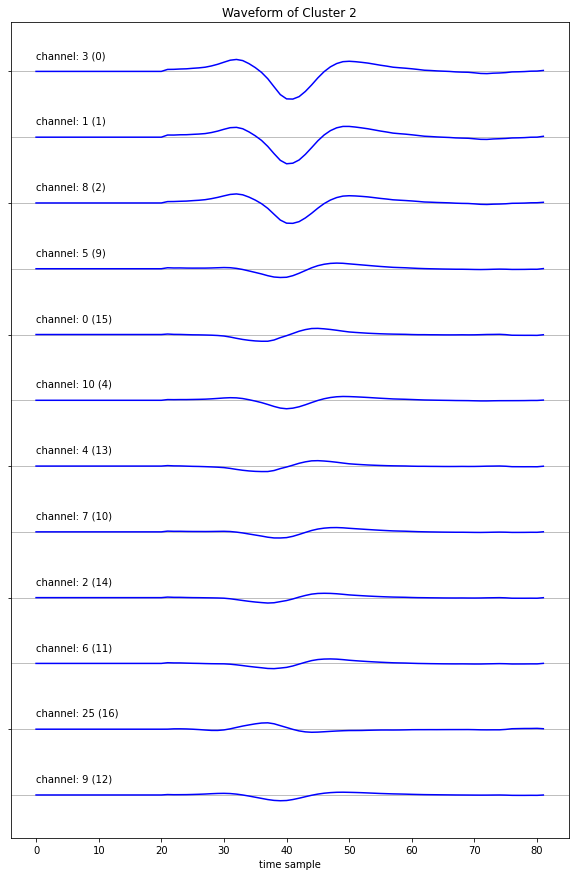

In [12]:
# plot on selected channels

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    
    channel_mapped, waveform = ses.get_waveform(cluster, channel)
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  
plt.title("Waveform of Cluster "+str(cluster))
plt.show()

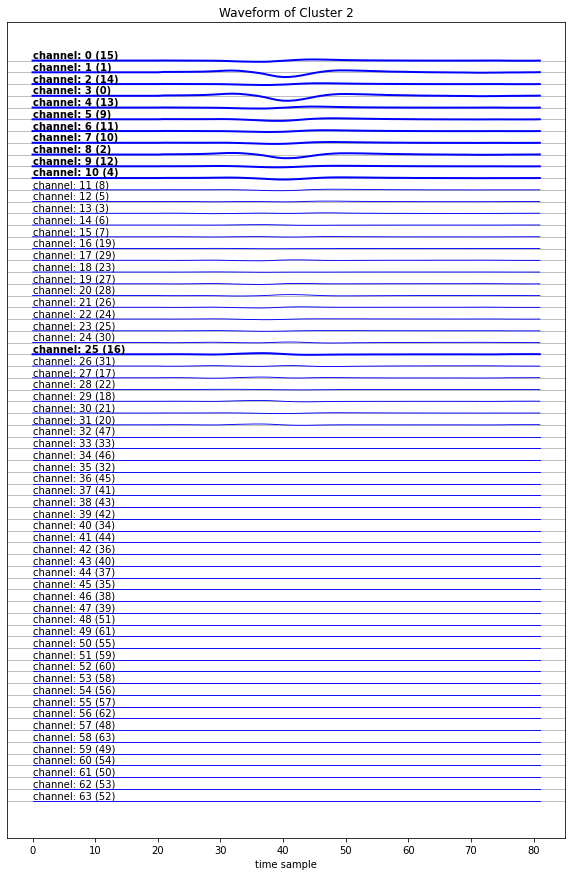

In [13]:
# plot all channels

channels_all = range(ses.wv_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels_all):
    channel_mapped, waveform = ses.get_waveform(cluster, channel)
    
    plot_style = [2.,'bold'] if channel in channels else [.9, 'normal']
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue" , lw=plot_style[0])
    plt.text( s= label , x=0, y=-i*.5 +.1 , weight=plot_style[1])
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  # remove the tick labels
ax.set(ylabel=None)  # remove the y-axis label
ax.tick_params(left=False)  # remove the ticks

plt.title("Waveform of Cluster "+str(cluster))
plt.show()

## Channel position (alignment)

In [14]:
ses.init_shanks()

channel: 0  ( 15 ), position: [ 1. 65.]
channel: 1  ( 1 ), position: [ 1. 64.]
channel: 2  ( 14 ), position: [ 1. 63.]
channel: 3  ( 0 ), position: [ 1. 62.]
channel: 4  ( 13 ), position: [ 1. 61.]
channel: 5  ( 9 ), position: [ 1. 60.]
channel: 6  ( 11 ), position: [ 1. 59.]
channel: 7  ( 10 ), position: [ 1. 58.]
channel: 8  ( 2 ), position: [ 2. 57.]
channel: 9  ( 12 ), position: [ 2. 56.]
channel: 10  ( 4 ), position: [ 2. 55.]
channel: 11  ( 8 ), position: [ 2. 54.]
channel: 12  ( 5 ), position: [ 2. 53.]
channel: 13  ( 3 ), position: [ 2. 52.]
channel: 14  ( 6 ), position: [ 2. 51.]
channel: 15  ( 7 ), position: [ 2. 50.]
channel: 16  ( 19 ), position: [ 3. 49.]
channel: 17  ( 29 ), position: [ 3. 48.]
channel: 18  ( 23 ), position: [ 3. 47.]
channel: 19  ( 27 ), position: [ 3. 46.]
channel: 20  ( 28 ), position: [ 3. 45.]
channel: 21  ( 26 ), position: [ 3. 44.]
channel: 22  ( 24 ), position: [ 3. 43.]
channel: 23  ( 25 ), position: [ 3. 42.]
channel: 24  ( 30 ), position: [ 4. 

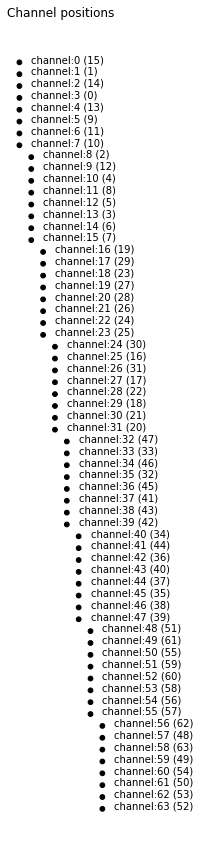

In [15]:
fig, ax = plt.subplots(figsize=(9,12))

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):
    print("channel:",channel," (",ses.channel_map[channel],"), position:",position)
        
    circle = plt.Circle((position[0], position[1]), 0.2, color="black")
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True) 
plt.title("Channel positions")
plt.tight_layout()
plt.show()

draw this for the specific cluster showing the significant channels

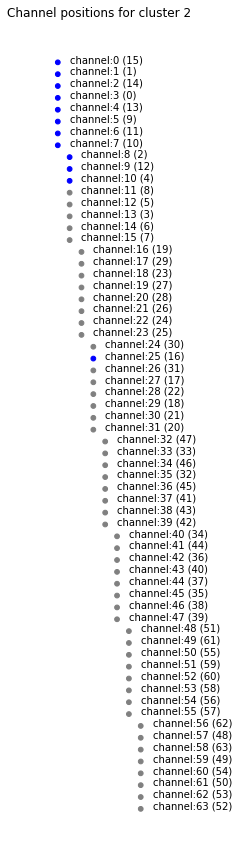

In [16]:
fig, ax = plt.subplots(figsize=(9,12))

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):        
    color = 'blue' if channel in channels else 'gray'
    
    circle = plt.Circle((position[0], position[1]), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    
ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True) 
plt.title("Channel positions for cluster "+str(cluster))
plt.tight_layout()
plt.show()

Reduce this to shanks (multiple channels are on one shank), and multiple shanks are in one brain region.
One neuron shall be unambigously defined on only one brain region. 

In [17]:
print("Shanks:", ses.shanks_all)

Shanks: [1. 2. 3. 4. 5. 6. 7. 8.]


In [18]:
shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)

In [19]:
if len(electrodes)!=1:
    print("Error, neuron was active on channels that belong to different brain regions!")

shank 1 (adn) is active
shank 2 (adn) is active
shank 3 (adn) is nope
shank 4 (adn) is active
shank 5 (mec) is nope
shank 6 (mec) is nope
shank 7 (mec) is nope
shank 8 (mec) is nope


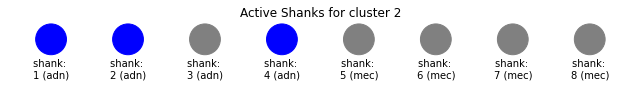

Brain region for neuron 2 is adn


In [20]:
fig, ax = plt.subplots(figsize=(9,3))

for i, (shank, active, el) in enumerate(zip(ses.shanks_all, shanks_arr, ses.desel)):
    print("shank",str(int(shank)),"("+el+")","is","active" if active else "nope")
    
    color = 'blue' if active else 'gray'
    
    circle = plt.Circle((i,0), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=i, y=-.5, s="shank: \n"+str(int(shank))+" ("+el+")", ha='center')

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
ax.autoscale(enable=True) 
plt.title("Active Shanks for cluster "+str(cluster))
plt.tight_layout()
plt.show()

print("Brain region for neuron",cluster,"is",electrodes[0])

## Create a pose file 

In [21]:
ap = Animal_pose(ses)
if not os.path.exists(f"{ses.fileBase}.pose.npy"):
    print("load from positrack")
    ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50, extension="positrack")
    ap.save_pose_to_file() # save the file for next time
else:
    print("load from saved pose file")
    ap.load_pose_from_file()

load from saved pose file


In [25]:
# debug pose loading
# ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50, extension="positrack")

In [26]:
np.nanmax(ap.pose[:,6])

/tmp/ipykernel_266020/829517808.py:1: RuntimeWarning: All-NaN slice encountered
  np.nanmax(ap.pose[:,6])


nan

In [27]:
ap.ttl_ups[0].shape

(25601,)

In [28]:
ap.ttl_ups

[array([   49749,    50571,    50970, ..., 10593664, 10594092, 10594478]),
 array([10644080, 10644737, 10645140, ..., 14453069, 14453495, 14453892]),
 array([14529732, 14530377, 14530770, ..., 31820644, 31821073, 31821479]),
 array([31860666, 31861338, 31861759, ..., 33969449, 33969883, 33970263]),
 array([34051104, 34051491, 34051909, ..., 64946786, 64947196, 64947601]),
 array([65036477, 65036868, 65037271, ..., 67751628, 67752043, 67752463]),
 array([67827770, 67828163, 67828578, ..., 94695944, 94696361, 94696773]),
 array([94785259, 94785650, 94786054, ..., 99800492, 99800900, 99801316]),
 array([ 99886939,  99887287,  99887698, ..., 124976518, 124976911,
        124977345])]

Plot the path of the animal to see if it was loaded correctly.

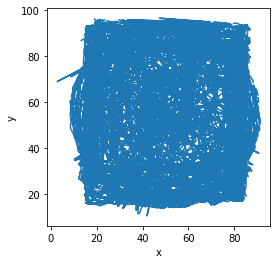

In [22]:
plt.plot(ap.pose[:,1],ap.pose[:,2])
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal', adjustable='box')

In [30]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

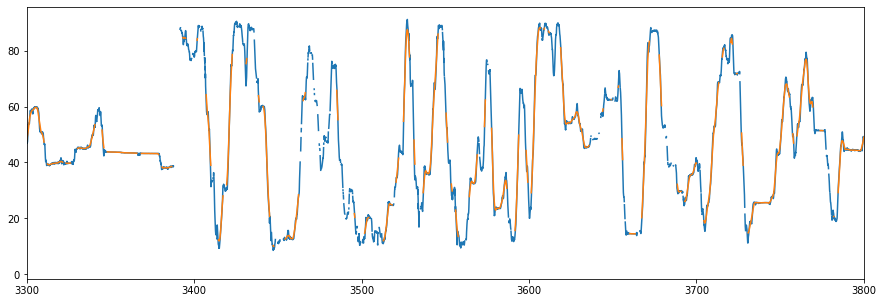

In [31]:
t = ap.pose[:,0]
x = ap.pose[:,1]
x_s = smooth(x,100)
plt.figure(figsize=(15,5))
plt.plot(t, x)
plt.plot(t, x_s) 
plt.xlim((3300,3800))
plt.show()

In [32]:
w = ((np.abs(x_s - x)>5) & (~np.isnan(x)))

In [33]:
w.sum()

987

In [34]:
t_w = t[w]

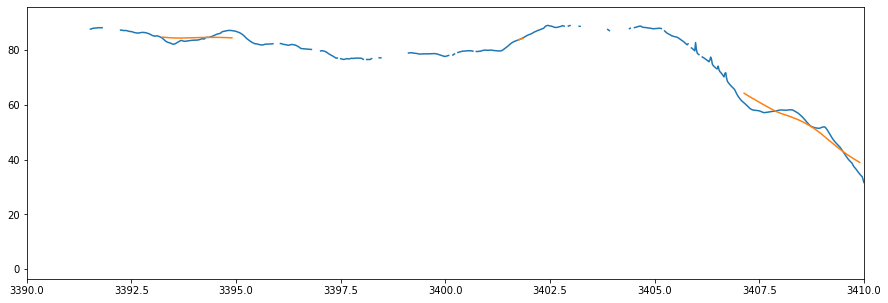

In [35]:
t = ap.pose[:,0]
x = ap.pose[:,1]
x_s = smooth(x,100)
plt.figure(figsize=(15,5))
plt.plot(t, x)
plt.plot(t, x_s) 
plt.scatter(t_w, np.ones_like(t_w))
plt.xlim((3390,3410))
plt.show()

In [36]:
len(x)

312547

In [41]:
ap.speed_from_pose()

In [42]:
ap.pose.shape

(399367, 7)

In [43]:
ap.speed.shape

(399367,)

In [44]:
ap.distance.shape

(399367,)

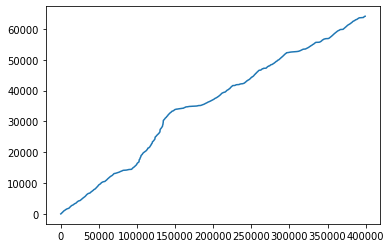

In [45]:
plt.plot(ap.distance)
#plt.plot(ap.speed)

Plot the occupancy map to see where the animal spent more or less time.

(The image seems mirrored since the x/y-axis for imshow is different compared to the plot function.)

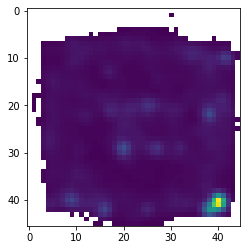

In [23]:
ap.occupancy_map_2d()
plt.imshow(ap.occupancy_map)
plt.show()

Plot the head-direction of the animal and its position a short segment.

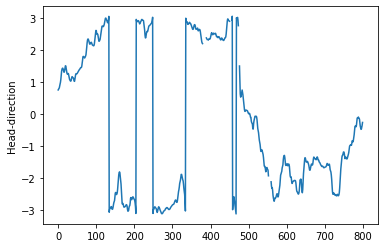

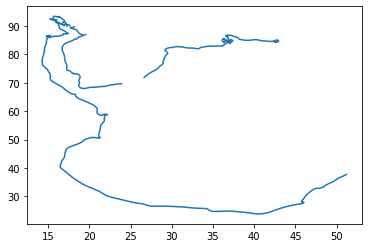

In [38]:
s=3000
e=3800
plt.plot(ap.pose[s:e,4])
plt.ylabel("Head-direction")
plt.show()
plt.plot(ap.pose[s:e,1],ap.pose[s:e,2])

Now we need to set the SpatialProperties object of each Neuron objects of the CellGroup.
Then we can get information score for each neuron from a firing rate map without smoothing.
We recalculate the maps with smoothing for display purposes.

Text(0.5, 0, 'Head direction (deg)')

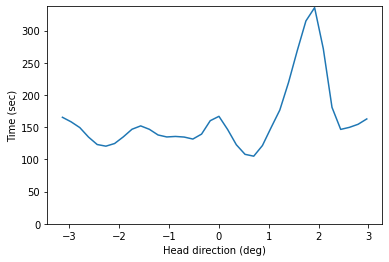

In [39]:
ap.head_direction_occupancy_histogram()
plt.plot(ap.hd_occupancy_bins[:-1],ap.hd_occupancy_histogram)
plt.ylim(0,np.max(ap.hd_occupancy_histogram)+2)
plt.ylabel("Time (sec)")
plt.xlabel("Head direction (deg)")

In [40]:
print("raio invalid HD =" , sum(np.isnan(ap.pose[:,4])) / len(ap.pose[:,4]))

raio invalid HD = 0.06706191388815122


hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length -0.8676376094982626 -49.71197317107028 0.03578284596803682


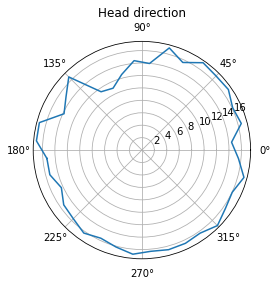

In [24]:
## demo execution for one neuron

# polar plot
n = cg.neuron_list[1]
n.set_spatial_properties(ap)
n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)

angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
hd_firing = n.spatial_properties.firing_rate_head_direction_histo

hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()

#print("angles:",len(angles),angles)
#print("hd_firing:",len(data),data)

print("hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length",hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.plot(angles, data)
ax.plot(np.append(angles,angles[0]), np.append(hd_firing,hd_firing[0]))
ax.grid(True)
#ax.axvline(hd_mean_direction_rad, hd_mean_vector_length, color="black")
ax.set_title("Head direction")
plt.show()

compare between trials

Trial 0 (pk3865-24012022_01)
environment: sqr70-black_cue-W
Interval: [[  0.      529.73995]]


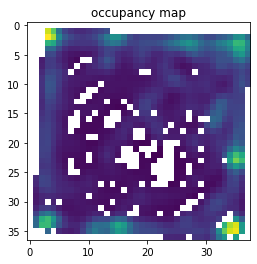

occupancy map <class 'numpy.ndarray'> (37, 38)
xy_range [[10.1362569  28.04337088]
 [80.1362569  98.04337088]]


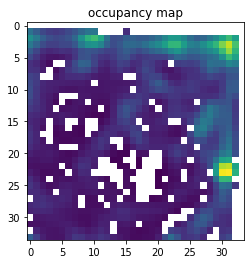

occupancy map <class 'numpy.ndarray'> (34, 34)


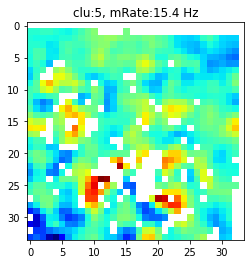

firingrate map <class 'numpy.ndarray'> (34, 34)

Trial 2 (pk3865-24012022_03)
environment: sqr70-white_cue-N
Interval: [[ 724.356   1591.09195]]


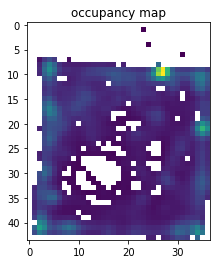

occupancy map <class 'numpy.ndarray'> (44, 37)
xy_range [[12.75749486 29.15316111]
 [82.75749486 99.15316111]]


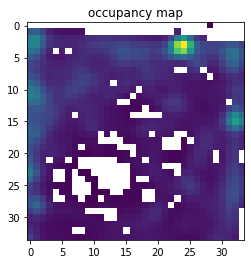

occupancy map <class 'numpy.ndarray'> (34, 34)


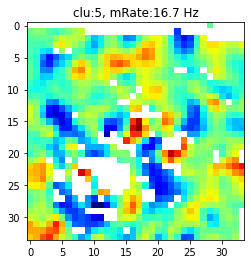

firingrate map <class 'numpy.ndarray'> (34, 34)

Trial 4 (pk3865-24012022_05)
environment: sqr70_black_cue-E
Interval: [[1700.532   3249.50395]]


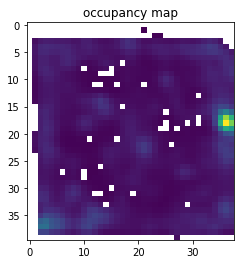

occupancy map <class 'numpy.ndarray'> (40, 38)
xy_range [[14.98465156 21.22207819]
 [84.98465156 91.22207819]]


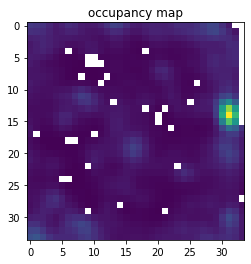

occupancy map <class 'numpy.ndarray'> (34, 34)


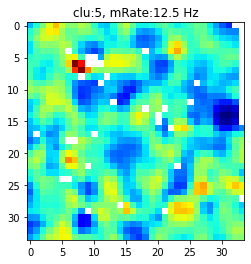

firingrate map <class 'numpy.ndarray'> (34, 34)

Trial 6 (pk3865-24012022_07)
environment: circ80_black_cue-S
Interval: [[3389.544   4737.13195]]


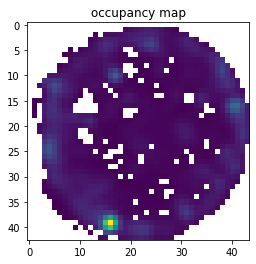

occupancy map <class 'numpy.ndarray'> (43, 44)
xy_range [[16.5366133 18.5748489]
 [86.5366133 88.5748489]]


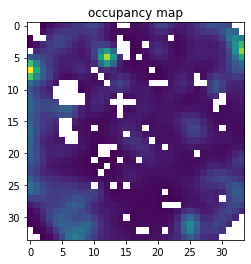

occupancy map <class 'numpy.ndarray'> (34, 34)


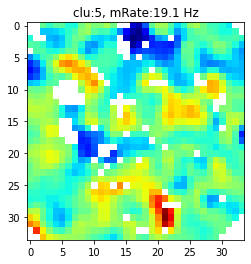

firingrate map <class 'numpy.ndarray'> (34, 34)

Trial 8 (pk3865-24012022_09)
environment: sqr70-black_cue-W
Interval: [[4992.336   6250.93195]]


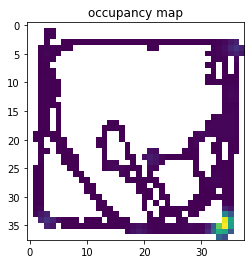

occupancy map <class 'numpy.ndarray'> (38, 38)
xy_range [[ 36.46951915  44.92662217]
 [106.46951915 114.92662217]]


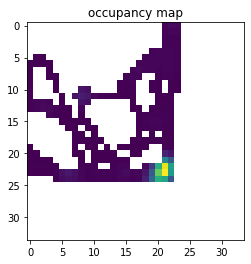

occupancy map <class 'numpy.ndarray'> (34, 34)


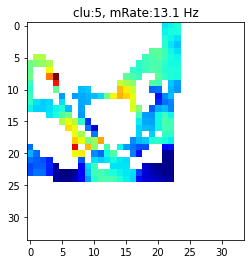

firingrate map <class 'numpy.ndarray'> (34, 34)



In [25]:

for i,(tn,iv,en) in enumerate(zip(ses.trial_names, ses.trial_intervals.inter, ses.desen)):
    
    if en=="rb":
        continue
    
    print("Trial",i,"("+tn+")") 
    print("environment:",en)
    
    iv=np.array([iv])
    print("Interval:",iv)

    # reset and set intervals
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(iv)
    ap.set_intervals(iv)
    n.set_spatial_properties(ap)
    
    # occupancy map
    ap.occupancy_map_2d()
    plt.imshow(ap.occupancy_map)
    plt.title("occupancy map")
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.gca().axis('equal')
    plt.show()
    print("occupancy map",type(ap.occupancy_map),ap.occupancy_map.shape)
    
    
    #xy_range = np.array([[0,0],[70,70]]) # [[xmin,ymin],[xmax,ymax]]
    xy_range = ap.invalid_outside_spatial_area(shape = "square", length=70)
    print("xy_range",xy_range)
    ap.occupancy_map_2d(xy_range=xy_range)
    plt.imshow(ap.occupancy_map)
    plt.title("occupancy map")
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.gca().axis('equal')
    plt.show()
    print("occupancy map",type(ap.occupancy_map),ap.occupancy_map.shape)
    
    # spatial firing map 
    #n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
    n.spatial_properties.firing_rate_map_2d(xy_range=xy_range)
    plt.imshow(n.spatial_properties.firing_rate_map,cmap='jet')
    plt.title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
    plt.show()
    print("firingrate map",type(n.spatial_properties.firing_rate_map),n.spatial_properties.firing_rate_map.shape)
   
    print("")


In [26]:
ses.n_trials

9

In [27]:
trials_environments = [ en for en in ses.desen if not en=="rb" ]

In [28]:
trials_environments

['sqr70-black_cue-W',
 'sqr70-white_cue-N',
 'sqr70_black_cue-E',
 'circ80_black_cue-S',
 'sqr70-black_cue-W']

In [29]:
n.spike_train.st

array([4992.4212 , 4992.4316 , 4992.53435, ..., 6250.18995, 6250.19525,
       6250.4942 ])

In [30]:
name

'pk3865-24012022-0109'

In [31]:
third_int = ses.trial_intervals.inter[2]
print(third_int)
int_len = np.diff(third_int)[0]
print(int_len)
np.linspace(third_int[0],third_int[1],5)

[ 724.356   1591.09195]
866.73595


array([ 724.356    ,  941.0399875, 1157.723975 , 1374.4079625,
       1591.09195  ])

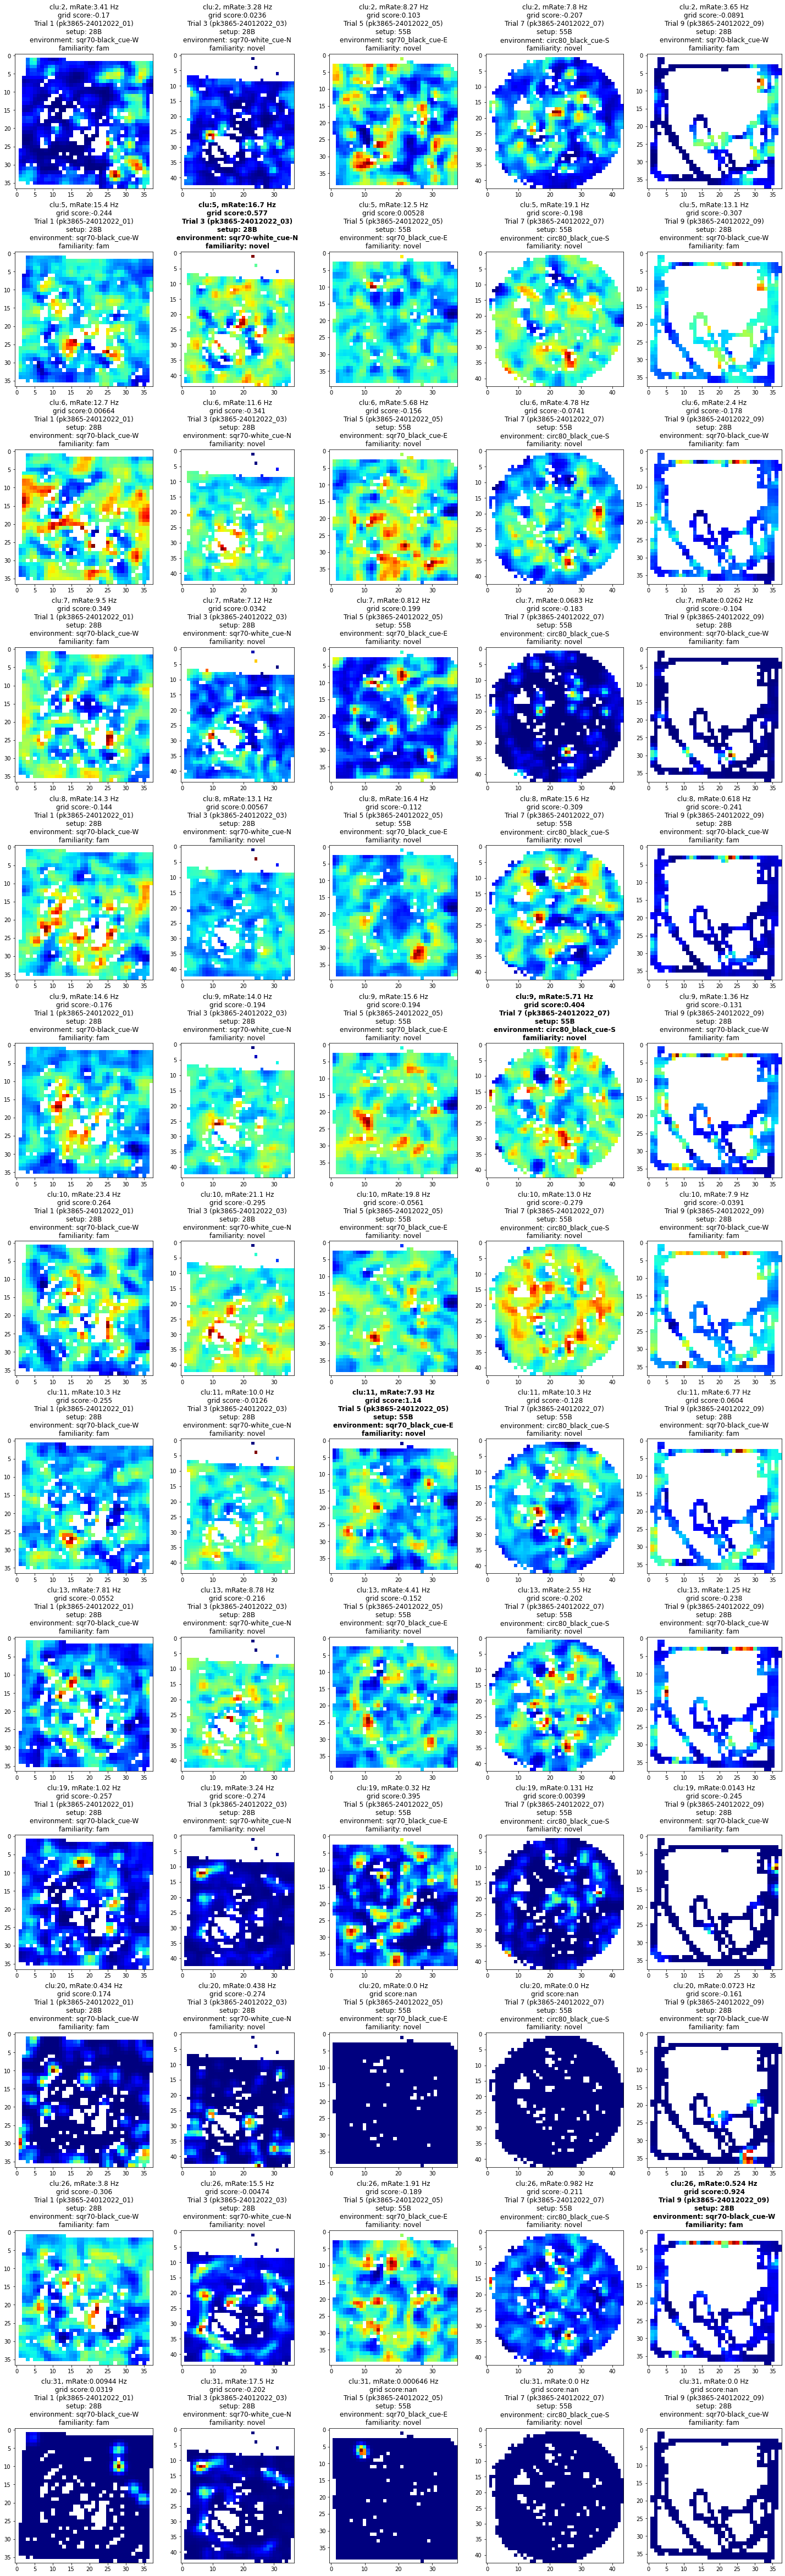

In [34]:
fig, axs = plt.subplots(len(cg.neuron_list), len(trials_environments), figsize=(20, 5*len(cg.neuron_list)), constrained_layout = True)

for i, n in enumerate(cg.neuron_list):
    
    n.set_spatial_properties(ap)
    
    j=0
    
    for t,(tn,iv,en,su,ef) in enumerate(zip(ses.trial_names, ses.trial_intervals.inter, ses.desen, ses.setup, ses.environmentFamiliarity)):
        
        if en=="rb":
            continue

        iv=np.array([iv])

        # reset and set intervals        
        n.spike_train.unset_intervals()
        ap.unset_intervals()
        n.spike_train.set_intervals(iv)
        ap.set_intervals(iv)

        # spatial firing map
        #xy_range = n.spatial_properties.ap.invalid_outside_spatial_area(shape = "square", length=70)
        n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
        #n.spatial_properties.firing_rate_map_2d(xy_range = xy_range)


        
        axs[i,j].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
        gs=n.spatial_properties.grid_score()
        
        fw='bold' if gs>.4 else 'normal'
            
        axs[i,j].set_title("clu:{}, mRate:{:.3} Hz\ngrid score:{:.3}".format(n.name,n.spike_train.mean_firing_rate(),gs) + "\n" + "Trial "+str(t+1)+" ("+tn+")"+"\n"+"setup: "+su+"\n"+"environment: "+en+"\n"+"familiarity: "+ef, fontweight=fw)
        axs[i,j].set_aspect('equal', adjustable='box')
        j+=1
        
    # testing
    #if i>2:
    #    break

#plt.tight_layout()
#fig.subplots_adjust(wspace=0.1, hspace=0.85)
#plt.savefig(prefixdir+'/home/pascal/Documents/science_docs/analysis_results/'+name+'_trials.pdf')
plt.show()


map correlation
0 0

Trial 1 (pk1615-19012022_01)
environment: sqr80_black
Interval: [[  0.      922.21195]]
xy_range [[ 9.37270531 29.67415082]
 [79.37270531 99.67415082]]

Trial 3 (pk1615-19012022_03)
environment: sqr80_white
Interval: [[1362.168   2690.96395]]
xy_range [[10.40733345 28.66696355]
 [80.40733345 98.66696355]]

Trial 5 (pk1615-19012022_05)
environment: sqr80_black
Interval: [[3343.716   4689.79195]]
xy_range [[ 5.79672779 27.62184163]
 [75.79672779 97.62184163]]

---
map1 (34, 34)


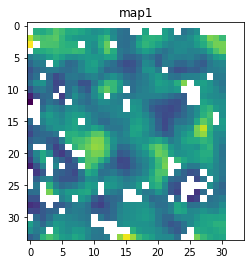

map2 (34, 34)


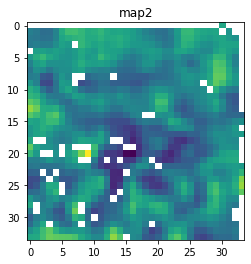

p= 0.02799765673889982
map1 (34, 34)


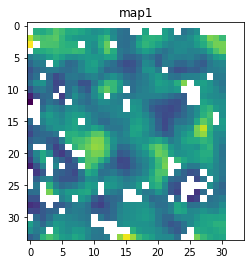

map2 (34, 34)


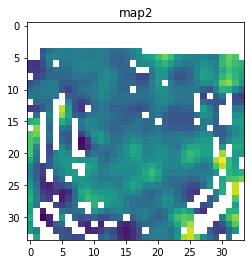

p= -0.020377049881307806
===
1 1

Trial 1 (pk1615-19012022_01)
environment: sqr80_black
Interval: [[  0.      922.21195]]
xy_range [[ 9.37270531 29.67415082]
 [79.37270531 99.67415082]]

Trial 3 (pk1615-19012022_03)
environment: sqr80_white
Interval: [[1362.168   2690.96395]]
xy_range [[10.40733345 28.66696355]
 [80.40733345 98.66696355]]

Trial 5 (pk1615-19012022_05)
environment: sqr80_black
Interval: [[3343.716   4689.79195]]
xy_range [[ 5.79672779 27.62184163]
 [75.79672779 97.62184163]]

---
map1 (34, 34)


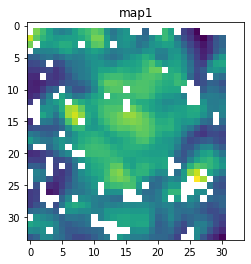

map2 (34, 34)


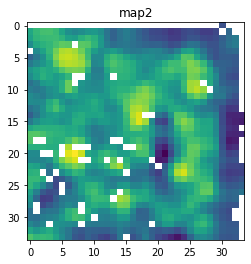

p= 0.2361080713087257
map1 (34, 34)


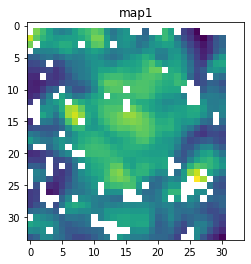

map2 (34, 34)


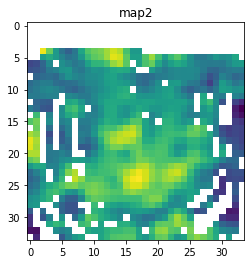

p= 0.1974346374536288
===
2 2

Trial 1 (pk1615-19012022_01)
environment: sqr80_black
Interval: [[  0.      922.21195]]
xy_range [[ 9.37270531 29.67415082]
 [79.37270531 99.67415082]]

Trial 3 (pk1615-19012022_03)
environment: sqr80_white
Interval: [[1362.168   2690.96395]]
xy_range [[10.40733345 28.66696355]
 [80.40733345 98.66696355]]

Trial 5 (pk1615-19012022_05)
environment: sqr80_black
Interval: [[3343.716   4689.79195]]
xy_range [[ 5.79672779 27.62184163]
 [75.79672779 97.62184163]]

---
map1 (34, 34)


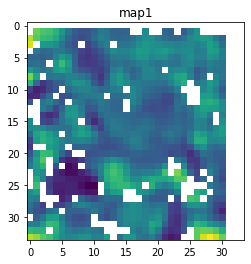

map2 (34, 34)


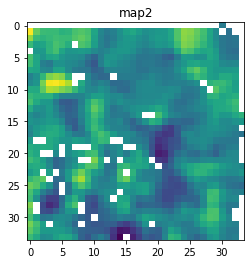

p= 0.033490081592814684
map1 (34, 34)


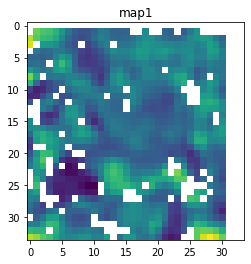

map2 (34, 34)


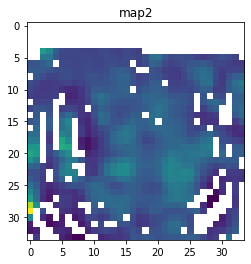

p= -0.02548495508221568
===
3 3

Trial 1 (pk1615-19012022_01)
environment: sqr80_black
Interval: [[  0.      922.21195]]
xy_range [[ 9.37270531 29.67415082]
 [79.37270531 99.67415082]]

Trial 3 (pk1615-19012022_03)
environment: sqr80_white
Interval: [[1362.168   2690.96395]]
xy_range [[10.40733345 28.66696355]
 [80.40733345 98.66696355]]

Trial 5 (pk1615-19012022_05)
environment: sqr80_black
Interval: [[3343.716   4689.79195]]
xy_range [[ 5.79672779 27.62184163]
 [75.79672779 97.62184163]]

---
map1 (34, 34)


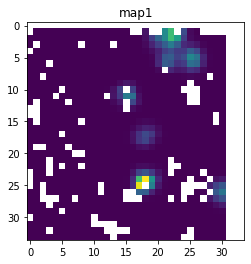

map2 (34, 34)


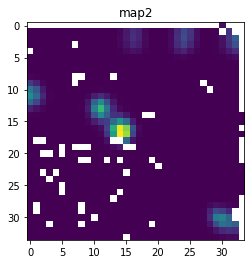

p= -0.017161622578446317
map1 (34, 34)


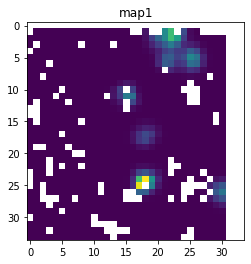

map2 (34, 34)


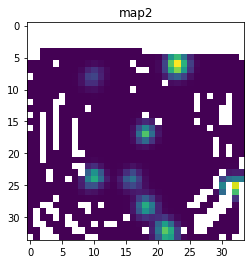

p= 0.2530290096031641
===


In [57]:
# map correlation

print("map correlation")

maps_correlation = [] # collect correlation of maps

for i, n in enumerate(cg.neuron_list):
    
    print("=====================")
    print(i,n.name)
    print("")
    
    n.set_spatial_properties(ap)    
    maps=[] # maps to compare with
    
    for t,(tn,iv,en) in enumerate(zip(ses.trial_names, ses.trial_intervals.inter, ses.desen)):

        if en=="rb":
            continue
            
        print("Trial",t+1,"("+tn+")")
        print("environment:",en)
        iv=np.array([iv])
        print("Interval:",iv)
        
        # reset and set intervals
        n.spike_train.unset_intervals()
        ap.unset_intervals()
        n.spike_train.set_intervals(iv)
        ap.set_intervals(iv)
        
        xy_range = n.spatial_properties.ap.invalid_outside_spatial_area(shape = "square", length=70)
        print("xy_range",xy_range)
        #n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
        n.spatial_properties.firing_rate_map_2d(xy_range = xy_range)
        
        firing_rate_map = n.spatial_properties.firing_rate_map
        
        if t==0:
            map1 = firing_rate_map
        else:
            maps.append(firing_rate_map)
        
        print("")
        
    
    print("---")
    
    mcorr=[] # for this neuron
    
    for map2 in maps:
        print("map1",map1.shape)
        plt.imshow(map1)
        plt.title("map1")
        plt.show()
        print("map2",map2.shape)
        plt.imshow(map2)
        plt.title("map2")
        plt.show()
        p = n.spatial_properties.map_crosscorrelation(map1=map1, map2=map2)
        print("p=",p)
        mcorr.append(p)
        
    maps_correlation.append(mcorr)
        
    print("===")
        
    #testing
    if i>2:
        break

In [67]:
maps_correlation = np.array(maps_correlation)
print(maps_correlation.shape)

(4, 2)


In [68]:
maps_correlation

array([[ 0.02799766, -0.02037705],
       [ 0.23610807,  0.19743464],
       [ 0.03349008, -0.02548496],
       [-0.01716162,  0.25302901]])

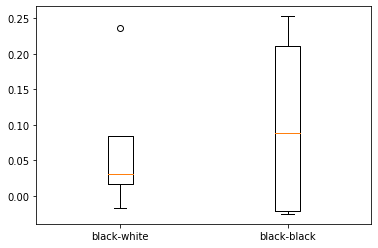

In [70]:
plt.boxplot(maps_correlation)
plt.xticks([1, 2], ['black-white', 'black-black'])
plt.show()

Loop for our neurons and do the analysis we need to know if we have spatially selective neurons or head-direction cells

In [ ]:
ses.trial_intervals.inter

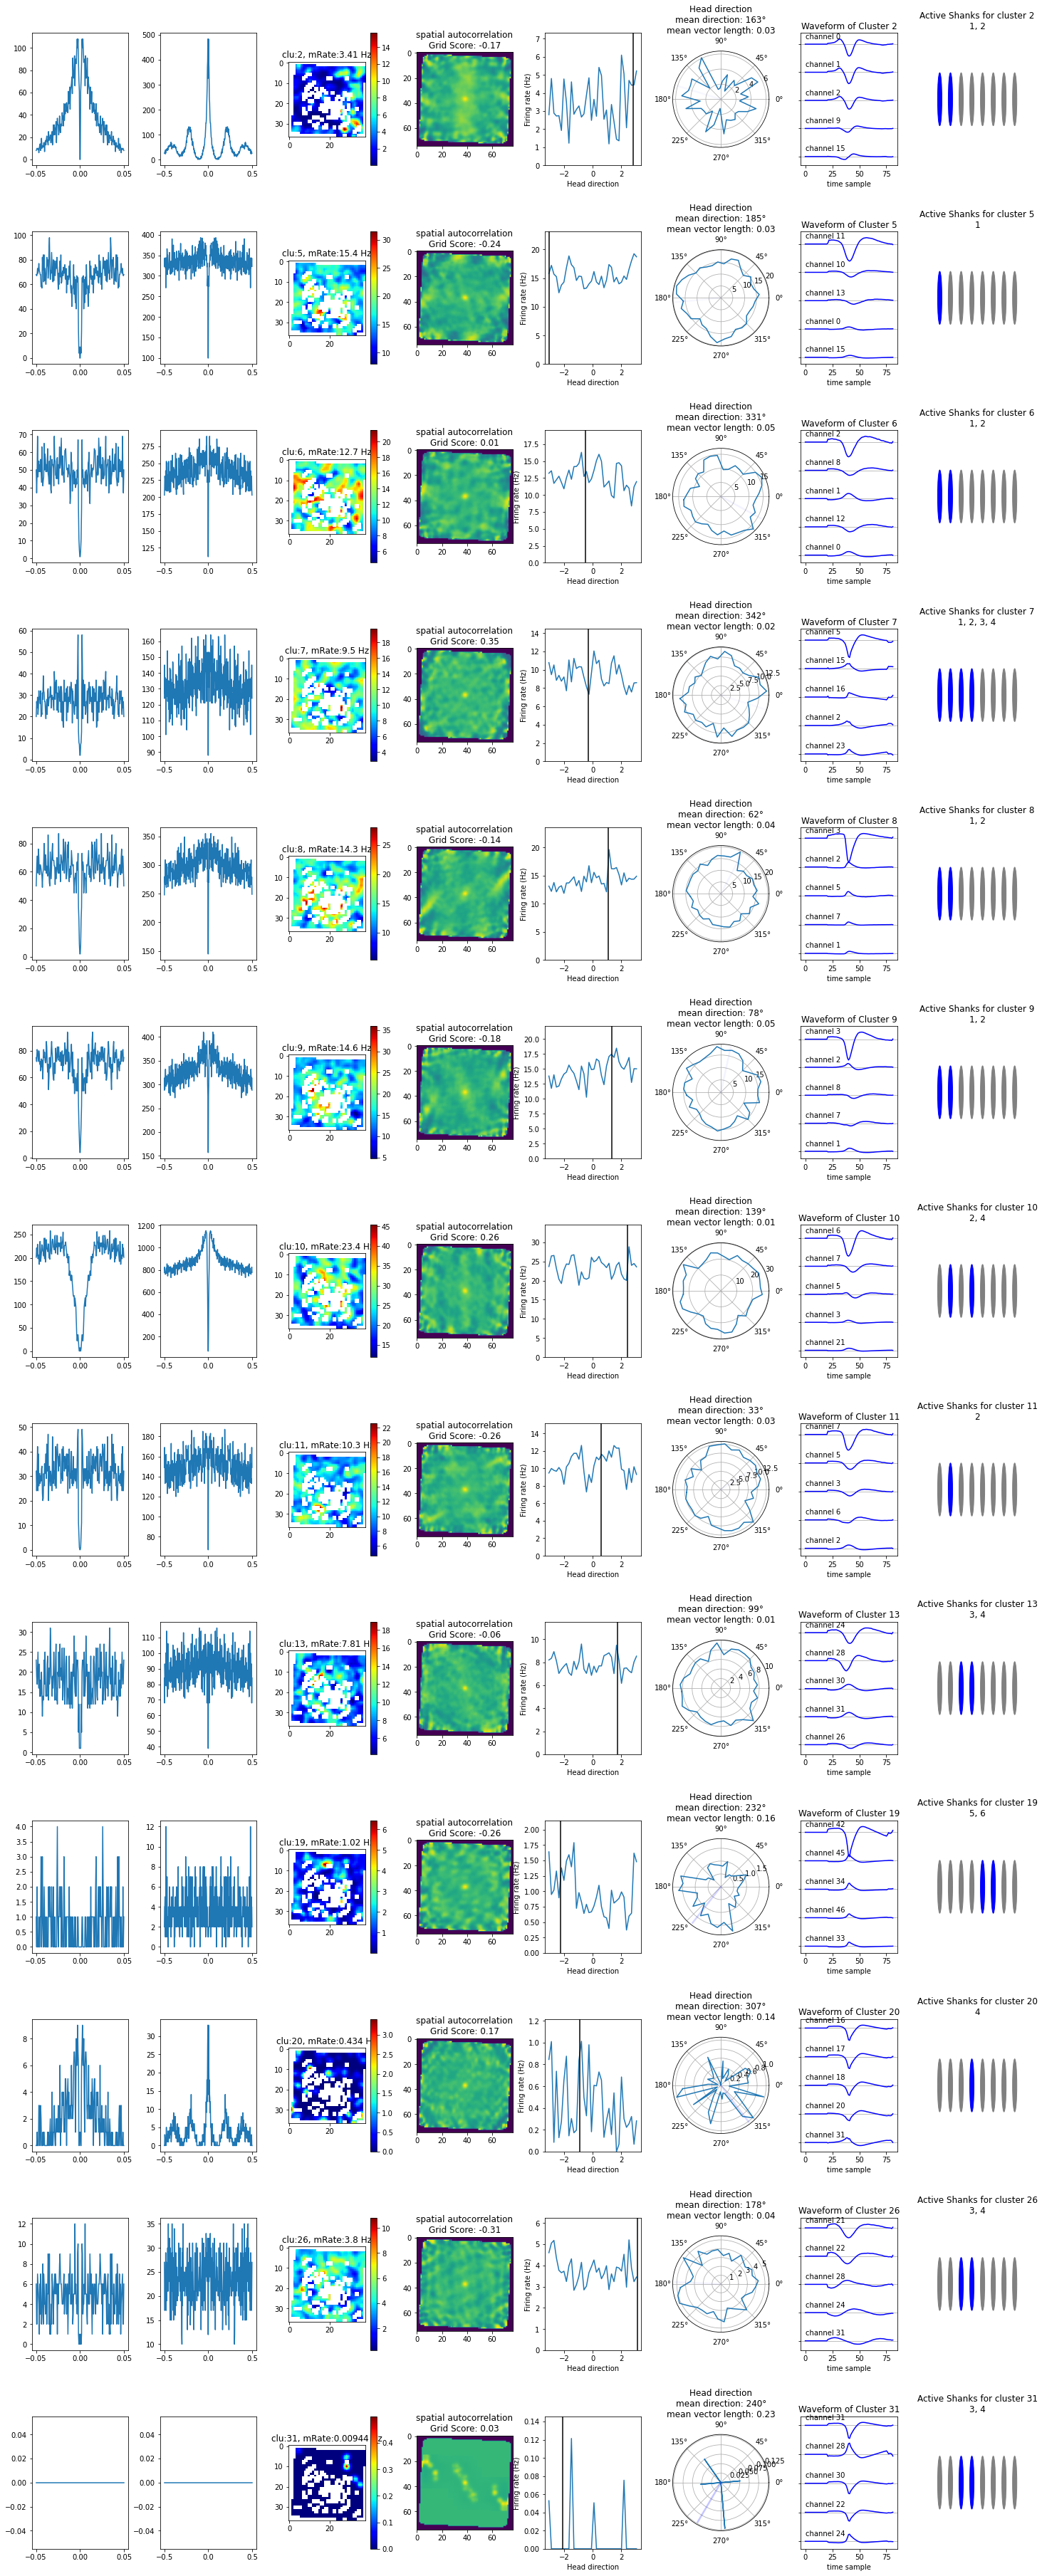

In [50]:
hd_firing_list=[] # neurons tuning curve
hd_ifr_list=[] # ifr list
spike_trains = [] # spike trains


# from matplotlib.patches import Rectangle

cols = 8

fig, axs = plt.subplots(len(cg.neuron_list), cols, figsize=(25, 5*len(cg.neuron_list)))
   
for i, n in enumerate(cg.neuron_list):
    
    # first interval
    iv = ses.trial_intervals.inter[0]
    iv = np.array([iv])

    # reset and set intervals
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(iv)
    ap.set_intervals(iv)
    
    
    
    # temporal auto-correlation
      
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0005,min_sec=-0.05, max_sec=0.05)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,0].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0025,min_sec=-0.5, max_sec=0.5)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,1].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    
    # clear intervals
    
    # n.spike_train.unset_intervals()
    # ap.unset_intervals()
    # n.spike_train.set_intervals(ses.trial_intervals.inter)
    # ap.set_intervals(ses.trial_intervals.inter)
    
    # spatial firing map 
    
    n.set_spatial_properties(ap)
    n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
    im = axs[i,2].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
    axs[i,2].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
    fig.colorbar(im,ax=axs[i,2])
    
    
    # Spatial autocorrelation Map & Grid Score
    gs = n.spatial_properties.grid_score()
    
    fw = "bold" if gs>.4 else "normal"
    
    axs[i,3].imshow(n.spatial_properties.spatial_autocorrelation_map)
    axs[i,3].set_title("spatial autocorrelation"+"\n"+"Grid Score: "+str(round(gs,2)), fontweight=fw)
    
    # Head direction
    
    n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)
    
    angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
    hd_firing = n.spatial_properties.firing_rate_head_direction_histo
    hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()
    
    axs[i,4].plot(angles, hd_firing)
    axs[i,4].set_xlabel("Head direction")
    axs[i,4].set_ylabel("Firing rate (Hz)")
    axs[i,4].set_ylim(0,np.max(n.spatial_properties.firing_rate_head_direction_histo)*1.2)
    axs[i,4].axvline(x=hd_mean_direction_rad, color="black")
    #axs[i,4].text(s=str(round(hd_mean_direction_rad*180./np.pi))+" ° (vector length = "+str(hd_mean_vector_length)+")",x=hd_mean+.1,y=1)
    
    fw = "bold" if hd_mean_vector_length>.4 else "normal"
    axs[i,5].axis('off')
    ax2 = fig.add_subplot(len(cg.neuron_list), cols, cols*i+6, polar=True)
    #ax2.plot(angles, hd_firing)
    ax2.plot(np.append(angles,angles[0]), np.append(hd_firing,hd_firing[0]))
    ax2.plot([hd_mean_direction_rad]*2, [0,max(hd_firing)] , color="blue", alpha=hd_mean_vector_length, lw=2.5  )
    ax2.set_title("Head direction" + "\n" + "mean direction: " + str(round( (hd_mean_direction_deg + 360) % 360  )) +"°" + "\n" + "mean vector length: " + str(np.round(hd_mean_vector_length,2))  , fontweight=fw) 
    ax2.grid(True)
    
    
    # Wavefroms
    
    cluster = int(n.name) # current cluster name
    channels = ses.get_channels_from_cluster(cluster) # get channels with highest amplitude
    
    if (len(channels)):
    
        for j,channel in enumerate(channels):
            channel_mapped, waveform = ses.get_waveform(cluster, channel)
            axs[i,6].axhline( y = -j*.5 , color="grey" , lw=.5 )
            #label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
            label = "channel "+str(channel_mapped)
            axs[i,6].plot( waveform -j*.5 , label=label , color="blue")
            axs[i,6].text( s= label , x=0, y=-j*.5 +.1 )
        axs[i,6].set_xlabel("time sample")
        axs[i,6].set(yticklabels=[])  
        axs[i,6].set_title("Waveform of Cluster "+str(cluster))
        
    # shanks
    shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)
   
    for j, (shank, active) in enumerate(zip(ses.shanks_all, shanks_arr)):
        color = 'blue' if active else 'gray'
        circle = plt.Circle((j,0), 0.2, color=color)
        axs[i,7].add_patch(circle)

    
    axs[i,7].axis('off')
    axs[i,7].set_title("Active Shanks for cluster "+str(cluster)+"\n"+', '.join([str(int(active_shank)) for active_shank in active_shanks]))
    
    axs[i,7].set_xlim([-1, len(ses.shanks_all)])
    axs[i,7].set_ylim([-0.5, 0.5])
    
    ###########################
    # classify, find category: Grid cell, HD cell
    
    if (hd_mean_vector_length > 0.4):
        n.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
        print("n.name",n.name)
        print("n.spike_train.ifr",n.spike_train.ifr)
        print("n.spike_train.st",n.spike_train.st)
        
        hd_firing_list.append(hd_firing)
        hd_ifr_list.append(n.spike_train.ifr)
        spike_trains.append(n.spike_train.st)
        
        #rect = Rectangle((0.08, 1-(i+.5)/len(cg.neuron_list)), 0.85, 1/len(cg.neuron_list), facecolor='yellow', edgecolor='none', transform=fig.transFigure, zorder=-1)
        #fig.patches.append(rect)

    
    
#plt.tight_layout()
fig.subplots_adjust(wspace=0.33, hspace=.5)
plt.savefig(prefixdir+'/home/pascal/Documents/science_docs/analysis_results/'+name+'.pdf')
plt.show()


In [ ]:
angles = np.array(angles)
print("angles.shape",angles.shape)

hd_firing_list = np.array(hd_firing_list)
print("hd_firing_list.shape",hd_firing_list.shape)

hd_ifr_list = np.array(hd_ifr_list)
print("hd_ifr_list.shape",hd_ifr_list.shape)

spike_trains = np.array(spike_trains)
print("spike_trains.shape",spike_trains.shape)
'''
np.save("angles.npy",angles)
np.save("hd_firing_list.npy",hd_firing_list)
np.save("hd_ifr_list.npy",hd_ifr_list)
np.save("ap-pose.npy",ap.pose)
np.save("spike_trains.npy",spike_trains)
#'''
plt.plot(hd_ifr_list[0,2])
ap.pose[:,0].shape
hd_ifr_list[0,2,:].shape
ap.pose[:,0]
hd_ifr_list[0,2,:]